In [6]:
# import sys
# !{sys.executable} -m pip install qutip
import numpy as np
import matplotlib.pyplot as plt
from arc import *  # Import ARC (Alkali Rydberg Calculator)
from qutip import *
from scipy.fft import fft, ifft
from scipy import constants 
from Alk_atom import alk_atom
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D 

In [9]:
N = 10
I = 1 # power in Watt
lambda0 = 780e-9 # central wavelength
omega = 2*np.pi*(3e8)/lambda0
alpha = np.floor(I/(constants.hbar*omega))#
# built of coherent state
rho_coherent = coherent_dm(N, 0)

# built of thermal state
rho_thermal = thermal_dm(N, 1)

# built of fock state
rho_fock = fock_dm(N, 1)
print(rho_coherent)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


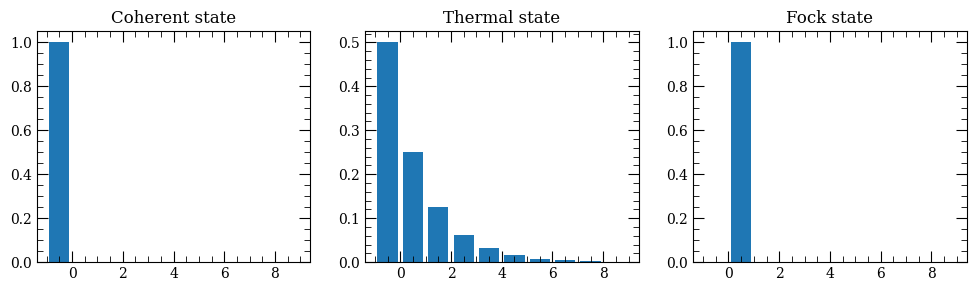

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

bar0 = axes[0].bar(np.arange(0, N)-.5, rho_coherent.diag())

lbl0 = axes[0].set_title("Coherent state")

# lim0 = axes[0].set_xlim([-.5, N])

bar1 = axes[1].bar(np.arange(0, N)-.5, rho_thermal.diag())

lbl1 = axes[1].set_title("Thermal state")

# lim1 = axes[1].set_xlim([-.5, N])

bar2 = axes[2].bar(np.arange(0, N)-.5, rho_fock.diag())

lbl2 = axes[2].set_title("Fock state")

# lim2 = axes[2].set_xlim([-.5, N])

plt.show()

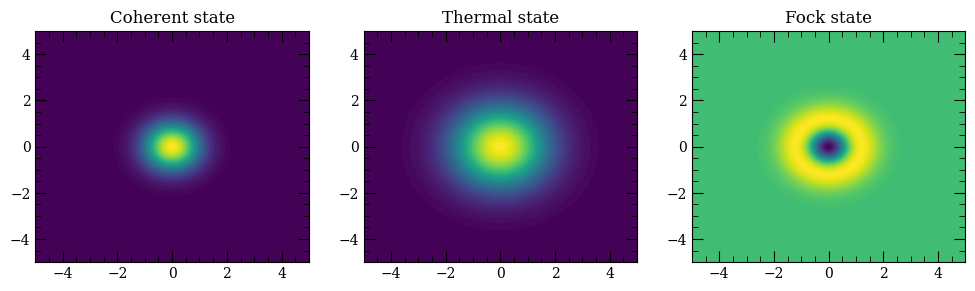

In [11]:
xvec = np.linspace(-5,5,200)

W_coherent = wigner(rho_coherent, xvec, xvec)

W_thermal = wigner(rho_thermal, xvec, xvec)

W_fock = wigner(rho_fock, xvec, xvec)

# plot the results

fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)

lbl0 = axes[0].set_title("Coherent state")

cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)

lbl1 = axes[1].set_title("Thermal state")

cont0 = axes[2].contourf(xvec, xvec, W_fock, 100)

lbl2 = axes[2].set_title("Fock state")

plt.show()